# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q=" 

city_name = []
city_id = []
lat = []
lon = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    weather_response = requests.get(query_url + city).json()
    #print(json.dumps(weather_response, indent=4, sort_keys=True)) - uncomment if you want to take a look at json format
    try:
        print("City name: " + weather_response["name"] + ". " + "City ID is: " + str(weather_response["id"]))
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp"])
        humidity.append(weather_response["main"]["humidity"])
        cloud.append(weather_response["clouds"]["all"])
        wind.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
    except (KeyError):
        print("Missing data")
       


City name: Gazimurskiy Zavod. City ID is: 2024122
City name: Rio Grande. City ID is: 3451138
City name: Airai. City ID is: 1651810
City name: Punta Arenas. City ID is: 3874787
City name: San Cristobal. City ID is: 3628473
City name: Kapaa. City ID is: 5848280
Missing data
City name: Isangel. City ID is: 2136825
Missing data
Missing data
City name: Ushuaia. City ID is: 3833367
City name: Jamestown. City ID is: 5122534
City name: Teguise. City ID is: 2510573
City name: East London. City ID is: 1006984
City name: Pokhara. City ID is: 1282898
City name: Busselton. City ID is: 2075265
City name: Belyy Yar. City ID is: 1510377
Missing data
City name: Bengkulu. City ID is: 1649150
City name: Yaan. City ID is: 2338660
City name: Tikhvin. City ID is: 483019
City name: Lebu. City ID is: 3883457
City name: Kavieng. City ID is: 2094342
City name: Cape Town. City ID is: 3369157
Missing data
City name: Albany. City ID is: 5106841
City name: Tessalit. City ID is: 2449893
City name: George Town. City 

City name: High Level. City ID is: 5975004
City name: Kutum. City ID is: 371745
City name: Sechura. City ID is: 3691954
City name: Aloleng. City ID is: 1731298
City name: Otorohanga. City ID is: 2185245
City name: Luderitz. City ID is: 3355672
City name: Nikolskoye. City ID is: 546105
City name: Matagami. City ID is: 6067747
City name: Hammerfest. City ID is: 779683
City name: La Ronge. City ID is: 6050066
City name: Belmonte. City ID is: 3470137
City name: Viedma. City ID is: 3832899
City name: Aklavik. City ID is: 5882953
City name: Chui. City ID is: 3443061
Missing data
City name: Avarua. City ID is: 4035715
City name: Ntcheu. City ID is: 924492
City name: Tual. City ID is: 1623197
City name: Sven. City ID is: 485785
City name: Port Alfred. City ID is: 964432
City name: Westport. City ID is: 4845585
City name: Port Macquarie. City ID is: 2152659
City name: Pacific Grove. City ID is: 5380437
City name: Taitung City. City ID is: 6949678
City name: Bethel. City ID is: 5282297
City name

City name: Tepalcatepec. City ID is: 3982007
City name: Beboto. City ID is: 2435837
City name: Pleshanovo. City ID is: 509017
City name: Camiri. City ID is: 3922414
City name: Traverse City. City ID is: 5012495
City name: Lokosovo. City ID is: 1500399
City name: Klaksvik. City ID is: 2618795
City name: Gainesville. City ID is: 4156404
City name: Te Anau. City ID is: 2181625
City name: Andenes. City ID is: 3163146
City name: Karasjok. City ID is: 779350
City name: Iqaluit. City ID is: 5983720
City name: Valparaiso. City ID is: 3868626
City name: Palmer. City ID is: 4946620
City name: Boa Vista. City ID is: 3664980
City name: Terrace. City ID is: 6162949
City name: Luba. City ID is: 2309528
City name: Troitskoye. City ID is: 1489209
City name: Roald. City ID is: 3141667
Missing data
City name: Kangayam. City ID is: 1268095
City name: Nsunga. City ID is: 151363
City name: Sayyan. City ID is: 70979
City name: Abu Samrah. City ID is: 172515
City name: Kostanay. City ID is: 1519928
City name

City name: Semnan. City ID is: 116402
City name: Greensboro. City ID is: 4469146
City name: Ostrovnoy. City ID is: 556268
City name: Borogontsy. City ID is: 2026160
City name: Ratnagiri. City ID is: 1258338
City name: Chokurdakh. City ID is: 2126123
City name: Sinazongwe. City ID is: 897456
City name: Karoi. City ID is: 889191
City name: Veraval. City ID is: 1253237
City name: Nyrob. City ID is: 516588
City name: Poso. City ID is: 1630723


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Display the DataFrame and change unix timestamp to datetime format

city_dict = {"City": city_name,
            "City_ID": city_id,
            "Latitude": lat,
            "Longitude": lon,
            "Temperature (F)": temp,
            "Humidity": humidity,
            "Cloudiness": cloud,
            "Wind_speed": wind,
            "Country": country,
            "Date": date
  }

weather_df = pd.DataFrame(city_dict)
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit='s')

weather_df.head()


,City,City_ID,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind_speed,Country,Date
0,Gazimurskiy Zavod,2024122,51.55,118.33,2.19,85,100,4.18,RU,2020-01-30 02:08:53
1,Rio Grande,3451138,-32.03,-52.10,75.99,78,73,5.73,BR,2020-01-30 02:08:53
2,Airai,1651810,-8.93,125.41,83.88,59,33,3.33,TL,2020-01-30 02:05:58
3,Punta Arenas,3874787,-53.15,-70.92,50.00,76,75,25.28,CL,2020-01-30 02:06:38
4,San Cristobal,3628473,7.77,-72.22,80.60,74,40,3.36,VE,2020-01-30 02:07:55


In [7]:
# Export city data into a .csv file

weather_df.to_csv("City_Data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

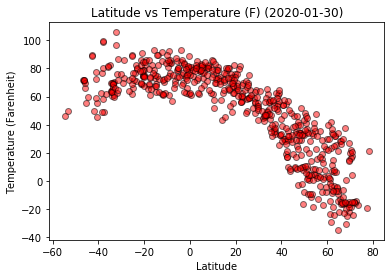

In [8]:
# Latitude vs. Temperature scatter plot

lat = weather_df["Latitude"]
temp = weather_df["Temperature (F)"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

plt.scatter(lat, temp, marker="o", facecolors="red", 
           edgecolors="black", alpha=0.5)
plt.title(f"Latitude vs Temperature (F) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.savefig("Images/LatVsTemp")


The code above is creating a scatterplot analyzing the data using Latitude versus Temperature.

#### Latitude vs. Humidity Plot

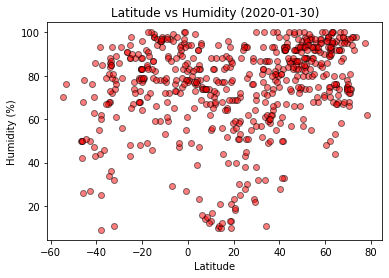

In [9]:
# Latitude vs. Humidity scatter plot

lat = weather_df["Latitude"]
hum = weather_df["Humidity"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

plt.scatter(lat, hum, marker="o", facecolors="red", 
           edgecolors="black", alpha=0.5)
plt.title(f"Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatVsHumidity")


The code above is creating a scatterplot analyzing the data using Latitude versus Humidity.

#### Latitude vs. Cloudiness Plot

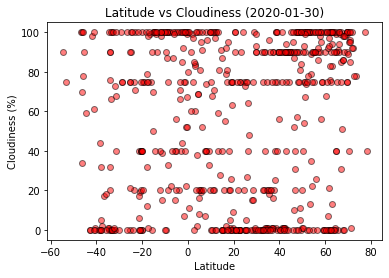

In [10]:
# Latitude vs. Cloudiness scatter plot

lat = weather_df["Latitude"]
cloudiness = weather_df["Cloudiness"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

plt.scatter(lat, cloudiness, marker="o", facecolors="red", 
           edgecolors="black", alpha=0.5)
plt.title(f"Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatVsCloudiness")


The code above is creating a scatterplot analyzing the data using Latitude versus Cloudiness.

#### Latitude vs. Wind Speed Plot

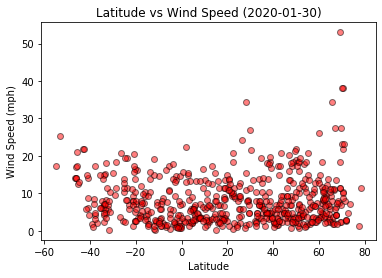

In [11]:
# Latitude vs. Wind Speed scatter plot

lat = weather_df["Latitude"]
cloudiness = weather_df["Wind_speed"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

plt.scatter(lat, cloudiness, marker="o", facecolors="red", 
           edgecolors="black", alpha=0.5)
plt.title(f"Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatVsWindspeed")

The code above is creating a scatterplot analyzing the data using Latitude versus Wind Speed.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_hemis = weather_df.loc[weather_df["Latitude"] >= 0]
#north_hemis.head(10) - uncomment if you want to see sample dataframe for northern hemisphere
south_hemis = weather_df.loc[weather_df["Latitude"] < 0]
#south_hemis.head() - uncomment if you want to see sample dataframe for southern hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7740539518685104.


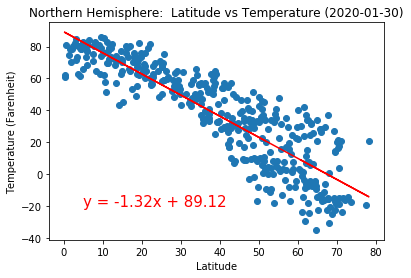

In [15]:
x_values = north_hemis["Latitude"]
y_values = north_hemis["Temperature (F)"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,-20), fontsize=15, color="red")
plt.title(f"Northern Hemisphere:  Latitude vs Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")

print(f"The r-squared value is {r_squared}.")

The chart above shows a strong negative correlation between a city's latitude and temperature (rvalue = -0.863895).  The scatter about the line is also relatively small, so there is a fairly strong linear relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.09054962653255533.


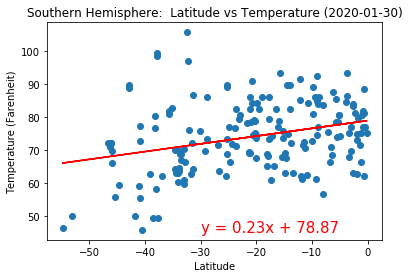

In [23]:
x_values = south_hemis["Latitude"]
y_values = south_hemis["Temperature (F)"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,45), fontsize=15, color="red")
plt.title(f"Southern Hemisphere:  Latitude vs Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")

print(f"The r-squared value is {r_squared}.")

The chart above shows a weak positive correlation between a city's latitude and temperature (rvalue = 0.374721). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.16074596562769125.


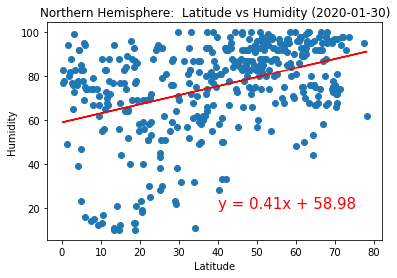

In [24]:
x_values = north_hemis["Latitude"]
y_values = north_hemis["Humidity"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")
plt.title(f"Northern Hemisphere:  Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-squared value is {r_squared}.")

It is clear from the scatterplot that as Latitude increases, there is no apparent effect on the Humidity.  In this case, it is possible to say that there is no association exists between the Latitude and Humidity for cities in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.14685746499091173.


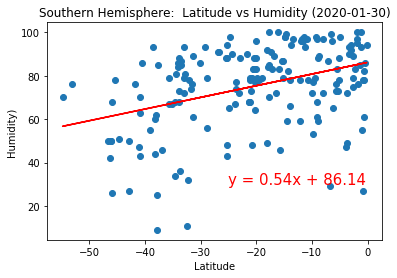

In [18]:
x_values = south_hemis["Latitude"]
y_values = south_hemis["Humidity"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,30), fontsize=15, color="red")
plt.title(f"Southern Hemisphere:  Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity)")

print(f"The r-squared value is {r_squared}.")

It is clear from the scatterplot that as Latitude increases, there is no apparent effect on the Humidity.  In this case, it is possible to say that there is no association exists between the Latitude and Humidity for cities in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.05739633484446847.


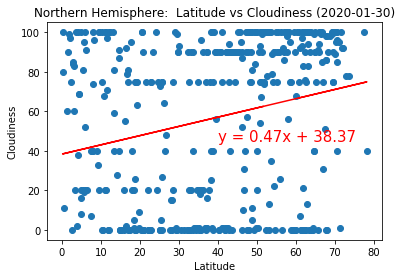

In [19]:
x_values = north_hemis["Latitude"]
y_values = north_hemis["Cloudiness"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,45), fontsize=15, color="red")
plt.title(f"Northern Hemisphere:  Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-squared value is {r_squared}.")

It is clear from the scatterplot that as Latitude increases, there is no apparent effect on the Coudiness.  In this case, it is possible to say that there is no association exists between the Latitude and Cloudiness for cities in the nothern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0650323537636429.


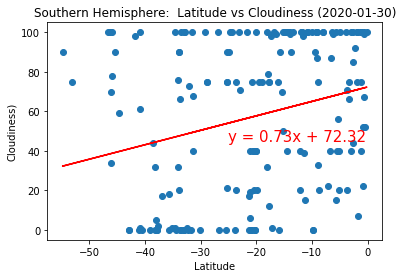

In [20]:
x_values = south_hemis["Latitude"]
y_values = south_hemis["Cloudiness"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,45), fontsize=15, color="red")
plt.title(f"Southern Hemisphere:  Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")

print(f"The r-squared value is {r_squared}.")

It is clear from the scatterplot that as Latitude increases, there is no apparent effect on the Cloudiness.  In this case, it is possible to say that there is no association exists between the Latitude and Cloudiness for cities in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.019867406276069033.


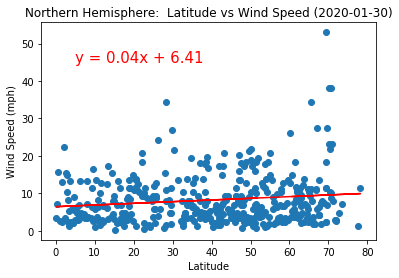

In [25]:
x_values = north_hemis["Latitude"]
y_values = north_hemis["Wind_speed"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,45), fontsize=15, color="red")
plt.title(f"Northern Hemisphere:  Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared value is {r_squared}.")

There is a very weak relationship between Latitude and Wind Speed (rvalue = 0.035497) for cities in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.13921864753588892.


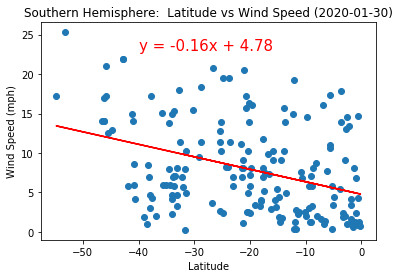

In [27]:
x_values = south_hemis["Latitude"]
y_values = south_hemis["Wind_speed"]
date = str(weather_df.iloc[0 , 9]).split(" ")[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,23), fontsize=15, color="red")
plt.title(f"Southern Hemisphere:  Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared value is {r_squared}.")

There is a very weak negative correlation between Latitude and Wind Speed (rvalue = -0.302385) for cities in the southern hemisphere.  It is interesting to see that the plots are more scattered compared to cities in the northern hemisphere.

## Observable Trends:


Trend 1:  Latitude doesn't seem to have an affect on humidity.


Trend 2:  The plots for cloudiness seem to line up at the same points in interesting straight lines:  at 0, 80 and 100%


Trend 3:  The only thing that seems to have any correlation to latitude is temperature in the northern hemisphere.